# Run SurvTRACE on SEER dataset

In [1]:
'''SEER data comes from https://seer.cancer.gov/data/
'''
from survtrace.dataset import load_data
from survtrace.evaluate_utils import Evaluator
from survtrace.utils import set_random_seed
from survtrace.model import SurvTraceMulti
from survtrace.train_utils import Trainer
from survtrace.config import STConfig

import matplotlib.pyplot as plt

# define the setup parameters
STConfig['data'] = 'seer'
STConfig['num_hidden_layers'] = 2
STConfig['hidden_size'] = 16
STConfig['intermediate_size'] = 64
STConfig['num_attention_heads'] = 2
STConfig['initializer_range'] = .02
STConfig['early_stop_patience'] = 5
set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 1024,
    'weight_decay': 0,
    'learning_rate': 1e-4,
    'epochs': 100,
}

In [2]:
# load data
df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = load_data(STConfig)

In [3]:
# get model
model = SurvTraceMulti(STConfig)

## kick off the training

In [4]:
# initialize a trainer & start training
trainer = Trainer(model)
train_loss_list, val_loss_list = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
        batch_size=hparams['batch_size'],
        epochs=hparams['epochs'],
        learning_rate=hparams['learning_rate'],
        weight_decay=hparams['weight_decay'],
        val_batch_size=10000,)

use pytorch-cuda for training.


D:\UIUC_AI_Health\SurvTRACE\survtrace\train_utils.py:208: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:1025.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


[Train-0]: 2.9641945240448933
[Val-0]: 1.9814077615737915
[Train-1]: 0.7204283676585372
[Val-1]: 0.6945959329605103
[Train-2]: 0.6825504732780716
[Val-2]: 0.6849672794342041
[Train-3]: 0.6769993368054734
[Val-3]: 0.6842683553695679
[Train-4]: 0.6750199766386122
[Val-4]: 0.6799230575561523
[Train-5]: 0.67327523515338
[Val-5]: 0.6782727837562561
[Train-6]: 0.6719713884146035
[Val-6]: 0.6769348382949829
[Train-7]: 0.6710905238073699
[Val-7]: 0.6765552759170532
[Train-8]: 0.6704727275436427
[Val-8]: 0.6768720149993896
EarlyStopping counter: 1 out of 5
[Train-9]: 0.669449763030422
[Val-9]: 0.6756874918937683
[Train-10]: 0.6691256964287791
[Val-10]: 0.6752216219902039
[Train-11]: 0.6683859139883599
[Val-11]: 0.6739037036895752
[Train-12]: 0.6683868603641484
[Val-12]: 0.6749087572097778
EarlyStopping counter: 1 out of 5
[Train-13]: 0.6675718284788585
[Val-13]: 0.673507571220398
[Train-14]: 0.6674971448726394
[Val-14]: 0.673939049243927
EarlyStopping counter: 1 out of 5
[Train-15]: 0.666773313

In [5]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

******************************
start evaluation
******************************


e:\anaconda3\envs\survtrace\lib\site-packages\sksurv\metrics.py:134: RuntimeWarning: overflow encountered in long_scalars
  concordant += n_con
e:\anaconda3\envs\survtrace\lib\site-packages\sksurv\metrics.py:134: RuntimeWarning: overflow encountered in long_scalars
  concordant += n_con
e:\anaconda3\envs\survtrace\lib\site-packages\sksurv\metrics.py:134: RuntimeWarning: overflow encountered in long_scalars
  concordant += n_con


Event: 0 For 0.25 quantile,
TD Concordance Index - IPCW: 0.9054360446472517
Brier Score: 0.03556944931818888
Event: 0 For 0.5 quantile,
TD Concordance Index - IPCW: 0.8831556261217498
Brier Score: 0.06044895229135169
Event: 0 For 0.75 quantile,
TD Concordance Index - IPCW: 0.8652413483065683
Brier Score: 0.08204407514522072
Event: 1 For 0.25 quantile,
TD Concordance Index - IPCW: 0.7997237378939374
Brier Score: 0.007855027637038457
Event: 1 For 0.5 quantile,
TD Concordance Index - IPCW: 0.7895639461300388
Brier Score: 0.015905955178805307
Event: 1 For 0.75 quantile,
TD Concordance Index - IPCW: 0.7722955042907839
Brier Score: 0.027555113590624722
done


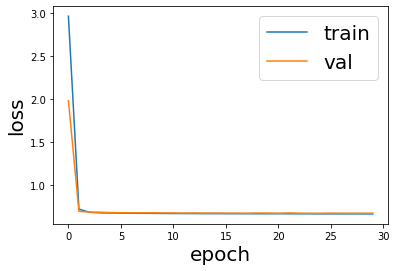

In [7]:
plt.plot(train_loss_list, label='train')
plt.plot(val_loss_list, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()